# Bell's inequality

## 1. Bcakground

### 1.1. Bell's theorem

Bell’s theorem is a famous no-go theorem in physics, first proposed by the Northern Irish physicist Bell in 1964. It states that quantum mechanics and local hidden-variable theories are incompatible, that is, any physical theory based on local hidden-variable cannot reproduce every result of quantum mechanics. Local hidden-variable theories are a kind of interpretation of quantum mechanics, which assume that the outcomes of quantum measurements are controlled by some unknown parameters, called hidden-variables, and that these hidden-variables are local, meaning that they do not affect the measurements in other places faster than the speed of light.  
Bell’s inequality is an inequality relation derived from local hidden-variable theories. If the experimental results violate Bell’s inequality, then it means that local hidden-variable theories are wrong, and thus confirms Bell’s theorem.  
The Nobel Prize in Physics 2022 was awarded to the French physicist Alain Aspect, the American theoretical and experimental physicist John F. Clauser, and the Austrian quantum physicist Anton Zeilinger, “for their experiments with entangled photons, establishing the violation of Bell’s inequality and opening up the field of quantum information science”. This reflects the importance of Bell’s theorem. At the same time, the violation of Bell’s inequality tells us that quantum entanglement is a fundamentally new resource, and one of the main tasks of quantum computing and quantum information is to use this new resource to perform information processing tasks that are impossible or difficult for classical resources.

### 1.2. Derivation of Bell's inequality

Imagine we conduct the following experiment. Charlie prepares two particles, one of which he sends to Alice and the other to Bob.  
Alice measures the particle as soon as she receives it. Let's say she has two different measuring devices, so she can choose one of two different measurement methods. The physical properties of these measurements are labeled $P_Q$ and $P_R$, respectively. Alice will randomly select a method to measure after receiving the particles. For simplicity, let's assume that the measurement can be $+1$ or $-1$. Suppose Alice's particle pair property $P_Q$ has a value $Q$. $Q$ is assumed to be an objective property of the Alice particle revealed only by measurement. Similarly, let $R$ represent the value obtained by the measurement property $P_R$.  
Similarly, suppose Bob can measure one of two attributes $P_S$ and $P_T$, and get the objectively existing attribute values $S$ and $T$, respectively, with values of $+1$ or $-1$. Bob randomly chooses a way to measure the particles after receiving them. The experiment arranged for Alice and Bob to take measurements at the same time (or, in the language of relativity, in a way that had no causal connection). Since the propagation speed of physical influence cannot exceed the speed of light, Alice and Bob's measurement results do not interfere with each other.  
We are going to do some simple algebra with the quantity $QS+RS+RT-QT$. Notice that
$$ QS+RS+RT-QT=(Q+R)S+(R-Q)T. $$
Because $R,Q=±1$, either $(Q+R)S = 0$, or $(R-Q)T = 0$. It is easy to see from the above equation that for each case, there is $ QS + RS + RT - QT = ±2 $. The probability of being in the state $Q = q, R = r, S = s, T = t$ before the measurement is $p(q,r,s,t)$. Order $E(·) $ represents the mean of the quantity, then we have
$$ E(QS)+E(RS)+E(RT)-E(QT)=E(QS+RS+RT-QT)=\sum_{qrst}p(q,r,s,t)(qs+rs+rt-qt)\leq\sum_{qrst}p(q,r,s,t) \times 2 = 2$$
This leads to Bell's inequality:
$$ E(QS)+E(RS)+E(RT)-E(QT)\leq 2 $$
This result is also known as the CHSH inequality. By repeating the experiment many times, Alice and Bob can determine each term on the left side of the Bell inequality, and check whether it holds in the actual experiment.

### 1.3. Violation of Bell’s inequality by quantum entanglement

Imagine we perform the following quantum mechanical experiment. Charlie prepares a quantum system of two qubits in the state
$$ | \psi\rangle =cos{\frac{\theta}{2}}|01\rangle + sin{\frac{\theta}{2}}|10\rangle,\quad\theta\in[0,2\pi). $$
He sends the first qubit to Alice and the second to Bob. They perform measurements of the following observables:
$$ Q = Z_1,R = X_1 ,S = \frac{-Z_2-X_2}{\sqrt{2}},T = \frac{Z_2-X_2}{\sqrt{2}}. $$
where $Z=\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$ , $X=\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$.  
Simple calculations show that the average values for these observables, written in the quantum mechanical $\langle \cdot \rangle$ notation, are:
$$ \langle QS \rangle=\frac{1}{\sqrt{2}},\langle RS \rangle = -\frac{1}{\sqrt{2}}sin\theta,\langle RT\rangle=-\frac{1}{\sqrt{2}}sin\theta,\langle QT\rangle=-\frac{1}{\sqrt{2}}. $$
Thus,
$$ \langle QS \rangle+\langle RS \rangle+\langle RT \rangle-\langle QT \rangle =\sqrt{2}-\sqrt{2}sin\theta. $$
When $\theta$ takes some specific angle, the above equation violates Bell's inequality, and we will demonstrate this by pyquafu below.

## 2. The general idea of the demonstration

Construct a quantum circuit to rotate the qubits from $|00\rangle$ to $|\psi\rangle =cos{\frac{\theta}{2}}|01\rangle + sin{\frac{\theta}{2}}|10\rangle$, where $\theta\in[0,2\pi)$. Rotate the measurement bases, and measure the qubits in the eigenstates of the operators $QS$,$RS$,$RT$,$QT$ respectively. Calculate the expectation values of the corresponding operators based on the measurement results, and compute the value of $ \langle QS \rangle+\langle RS \rangle+\langle RT \rangle-\langle QT \rangle $. If this value is greater than 2, then it violates Bell's inequality. Compare the experimental results with the theoretical values. Change the value of $\theta$, and repeat the previous steps, to demonstrate for different quantum states $|\psi\rangle$.

## 3. Demonstration

### 3.1. Create entangled state

Define a function to create an entangled state of 2-qubits, changing the quantum state from $|00 \rangle$ to $|\psi\rangle =cos{\frac{\theta}{2}}|01\rangle + sin{\frac{\theta}{2}}|10\rangle$, $\theta\in[0,2\pi)$. Note that this notation is not exactly the same as the commonly used Bloch sphere notation.

In [1]:
from quafu import QuantumCircuit, simulate, Task
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, cos, sin, sqrt

def create_state(theta):
    """ create a 2-qubit entangled state
    |00> --> |ψ> = cos(θ/2)|01> + sin(θ/2)|10> θ∈[0,2pi)"""
    qc = QuantumCircuit(2)
    qc.ry(0, theta)
    qc.x(1)
    qc.cnot(0,1)
    qc.barrier([0,1])
    return qc

### 3.2. Change measure bases

Define the operators $ Q = Z_1,R = X_1 ,S = \frac{-Z_2-X_2}{\sqrt{2}},T = \frac{Z_2-X_2}{\sqrt{2}} $, where the subscript indicates which qubit the operator acts on. The eigenstates of these operators with eigenvalue 1 are shown below:  
$S=\frac{-Z-X}{\sqrt{2}}=\begin{pmatrix} -\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\end{pmatrix}$ : $ |v_+\rangle=-\frac{1}{\sqrt{4+2\sqrt{2}}}|0\rangle+\frac{1+\sqrt{2}}{\sqrt{4+2\sqrt{2}}}|1\rangle$,  
$T=\frac{Z-X}{\sqrt{2}}=\begin{pmatrix} \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}\end{pmatrix}$ : $ |u_+\rangle=-\frac{1+\sqrt{2}}{\sqrt{4+2\sqrt{2}}}|0\rangle+\frac{1}{\sqrt{4+2\sqrt{2}}}|1\rangle$,  
$R = X=\begin{pmatrix} 0 & 1 \\ 1 & 0\end{pmatrix} $ : $| + \rangle = \frac{1}{\sqrt{2}}(| 0 \rangle + | 1 \rangle)$, $ \qquad Q = Z=\begin{pmatrix} 1 & 0 \\ 0 & -1\end{pmatrix}$ : $|0\rangle$.  
Based on the eigenstates of these operators, we can define a function to rotate the measurement basis, so that each circuit can measure the expectations of $QS$,$RS$,$RT$,$QT$.

In [2]:
phi1 = np.arccos(-1/sqrt(4+2*sqrt(2)))  # Used to rotate to the eigenstate corresponding to eigenvalue 1 of the S operator
phi2 = np.arccos(-(1+sqrt(2))/sqrt(4+2*sqrt(2)))  # Used to rotate to the eigenstate corresponding to eigenvalue 1 of the T operator

def QS(theta):
    qc = create_state(theta)
    qc.ry(1,-phi1*2)  # Change the measurement bases of the second qubit to the eigenstates of S
    qc.measure([0,1])
    return qc
def RS(theta):
    qc = create_state(theta)
    qc.ry(0,-pi/2)  # Change the measurement bases of the first qubit to the eigenstates of R
    qc.ry(1,-phi1*2)  # Change the measurement bases of the second qubit to the eigenstates of S
    qc.measure([0,1])
    return qc
def RT(theta):
    qc = create_state(theta)
    qc.ry(0,-pi/2)  # Change the measurement bases of the first qubit to the eigenstates of R
    qc.ry(1,-phi2*2)  # Change the measurement bases of the second qubit to the eigenstates of T
    qc.measure([0,1])
    return qc
def QT(theta):
    qc = create_state(theta)
    qc.ry(1,-phi2*2)  # Change the measurement bases of the second qubit to the eigenstates of T
    qc.measure([0,1])
    return qc
Circuit = [QS,RS,RT,QT]
Circuit_name = ['QS','RS','RT','QT']

As an example, we use $\theta = \frac{\pi}{2}$ and the eigenstate of $RS$ as the measurement basis, and draw the quantum circuit diagram.

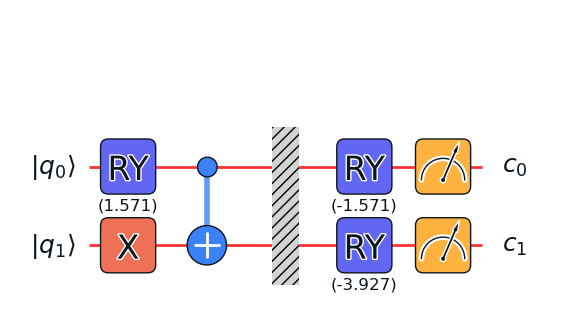

In [3]:
q = Circuit[1](theta=pi/2)
q.plot_circuit()

### 3.3. Create  tasks

Define a function to create the demonstration tasks. It has two parameters, `theta_num` and `experimental`. `theta_num` is used to determine how many values of $\theta$ to take, and `experimental` is used to choose whether to run on a real mechine or simulate with a simulator. The function will take `theta_num` theta values uniformly in the interval $[0,2\pi)$ for measurement, and place the measured expection $\langle QS \rangle,\langle RS \rangle,\langle RT \rangle$ and $\langle QT \rangle$ in `obsexp`.  
The function has three return parameters, `theta`, `obsexp`, `experimental`, which respectively represent the taken theta value, corresponding four expectations and whether it is running on real machine or simulator. Besides, if running on a real machine, the function will show the history of the task, and you can save it for later viewing.

In [4]:
def Bell_inequality_demo(theta_num = 5, experimental: bool = False):
    theta_step=2*pi/theta_num  
    theta=[]  # To save the value of theta
    obsexp=[]  # To save the value of E(QS),E(RS),E(RT),E(QT)
    name=["θ={:.3f}*pi".format(i*theta_step/pi)  for i in range(theta_num)]  # Name of each task
    groupname="Bell_inequality"  # Name of group
    task = Task()  # Create and configure task
    task.config(backend="ScQ-P18", shots=2000, compile=True) # "ScQ-P10", "ScQ-P18", "ScQ-P136"
    if experimental:
        print("sending task...")
    for i in range(theta_num):
        theta_i = i*theta_step
        sub_obsexp=[] # To save the value of E(QS),E(RS),E(RT),E(QT) in this loop
        for j in range(4):  # Traverse the corresponding circuits of the four measurement operators
            qc = Circuit[j](theta_i)
            if experimental:
                sub_res = task.send(qc, name=','.join([name[i],Circuit_name[j]]), group=groupname)
                sub_obsexp.append(sub_res.calculate_obs([0,1]))
            else:
                simu_res = simulate(qc)
                sub_obsexp.append(simu_res.calculate_obs([0,1]))
        print('θ={:.3f}*pi, E(QS) = {:.6f}, E(RS) = {:.6f}, E(RT) = {:.6f}, E(QT) = {:.6f}'.format(theta_i/pi,*sub_obsexp))
        theta.append(theta_i)
        obsexp.append(sub_obsexp)
    if experimental:
        history=task.get_history()
        print("","taskid：",history,"",sep="\n")  # Save the history to disk if you want to retrieve it next time
    return theta,obsexp,experimental

## 4. Show the result

To show the theoretical curve, we take 100 theta values uniformly in the interval $[0,2\pi)$ and calculate its theoretical value.

In [5]:
def Theoretical_value(theta):
    return np.sqrt(2)*(1-sin(theta))  # E(QS)+E(RS)+E(RT)-E(QT)
x = np.linspace(0, 2*pi, 100)
y = Theoretical_value(x)

In [6]:
def Plot_theoretical_value(x,y):
    plt.plot(x, y, label="Theoretical value: sqrt(2)*(1-sin(θ))")
    plt.xlabel("theta")
    plt.ylabel("E(QS)+E(RS)+E(RT)-E(QT)")
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.17))

### 4.1. Simulation result

By calling the `Bell_inequality_demo` function and setting the `experimental` parameter to False, we can get results operating on the simulator, which can then be visualized with the method in matplotlib. The boundary line of Bell's inequality is plotted in the figure, and the result above the boundary line is a violation of Bell's inequality.

θ=0.000*pi, E(QS) = 0.707107, E(RS) = 0.000000, E(RT) = -0.000000, E(QT) = -0.707107
θ=0.250*pi, E(QS) = 0.707107, E(RS) = -0.500000, E(RT) = -0.500000, E(QT) = -0.707107
θ=0.500*pi, E(QS) = 0.707107, E(RS) = -0.707107, E(RT) = -0.707107, E(QT) = -0.707107
θ=0.750*pi, E(QS) = 0.707107, E(RS) = -0.500000, E(RT) = -0.500000, E(QT) = -0.707107
θ=1.000*pi, E(QS) = 0.707107, E(RS) = 0.000000, E(RT) = -0.000000, E(QT) = -0.707107
θ=1.250*pi, E(QS) = 0.707107, E(RS) = 0.500000, E(RT) = 0.500000, E(QT) = -0.707107
θ=1.500*pi, E(QS) = 0.707107, E(RS) = 0.707107, E(RT) = 0.707107, E(QT) = -0.707107
θ=1.750*pi, E(QS) = 0.707107, E(RS) = 0.500000, E(RT) = 0.500000, E(QT) = -0.707107
θ=0.000*pi, E(QS)+E(RS)+E(RT)-E(QT)=1.414214
θ=0.250*pi, E(QS)+E(RS)+E(RT)-E(QT)=0.414214
θ=0.500*pi, E(QS)+E(RS)+E(RT)-E(QT)=-0.000000
θ=0.750*pi, E(QS)+E(RS)+E(RT)-E(QT)=0.414214
θ=1.000*pi, E(QS)+E(RS)+E(RT)-E(QT)=1.414214
θ=1.250*pi, E(QS)+E(RS)+E(RT)-E(QT)=2.414214
θ=1.500*pi, E(QS)+E(RS)+E(RT)-E(QT)=2.828427
θ=1.

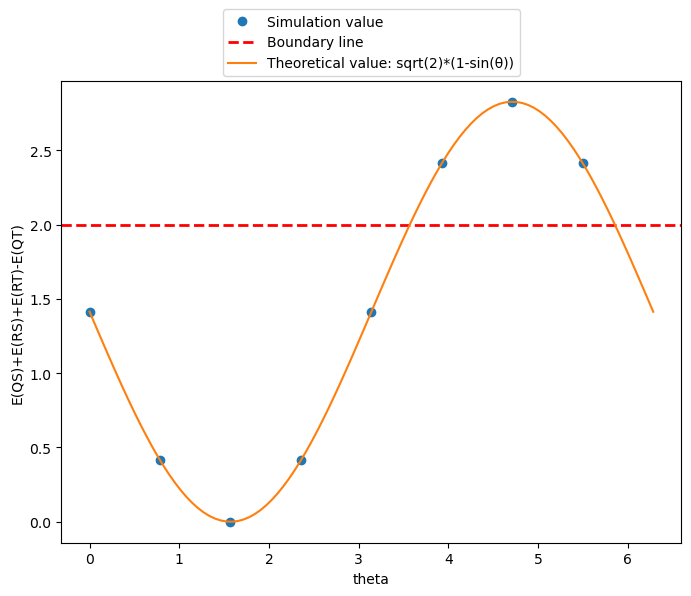

In [7]:
theta, obsexp, experimental = Bell_inequality_demo(theta_num = 8, experimental = False)
res=[obsexp[i][0] + obsexp[i][1] + obsexp[i][2] - obsexp[i][3] for i in range(len(obsexp))]  # E(QS)+E(RS)+E(RT)-E(QT)
for i in range(len(res)):
    print("θ={:.3f}*pi,".format(theta[i]/pi),"E(QS)+E(RS)+E(RT)-E(QT)={:.6f}".format(res[i]))  # Show the result data
# Show the result graph
plt.figure(figsize=(8, 6)) # Set the image size
plt.plot(theta, res, "o", label="Simulation value")
plt.axhline(y=2, color='red', linestyle='--', linewidth=2, label='Boundary line')  # Draw the boundary line of Bell's inequality
Plot_theoretical_value(x,y)
plt.show()

### 4.2. Experimental result

By setting the `experimental` parameter to True, we can get results running on the real machine. And the history of the task will be shown.

sending task...
θ=0.000*pi, E(QS) = 0.682000, E(RS) = 0.003000, E(RT) = 0.020000, E(QT) = -0.648000
θ=0.250*pi, E(QS) = 0.688000, E(RS) = -0.448000, E(RT) = -0.546000, E(QT) = -0.649000
θ=0.500*pi, E(QS) = 0.680000, E(RS) = -0.619000, E(RT) = -0.731000, E(QT) = -0.646000
θ=0.750*pi, E(QS) = 0.633000, E(RS) = -0.494000, E(RT) = -0.593000, E(QT) = -0.677000
θ=1.000*pi, E(QS) = 0.549000, E(RS) = 0.089000, E(RT) = -0.146000, E(QT) = -0.679000
θ=1.250*pi, E(QS) = 0.640000, E(RS) = 0.437000, E(RT) = 0.450000, E(QT) = -0.707000
θ=1.500*pi, E(QS) = 0.739000, E(RS) = 0.626000, E(RT) = 0.728000, E(QT) = -0.680000
θ=1.750*pi, E(QS) = 0.729000, E(RS) = 0.458000, E(RT) = 0.495000, E(QT) = -0.707000

taskid：
{'Bell_inequality': ['323CCF901FC0E415', '323CD0102C9FCC2C', '323CD0A03B281AA3', '323CD1400C0F9DAE', '323CD1D01B5EA338', '323CD2602A265C08', '323CD2F038C975D5', '323CD3900BE41141', '323CD4201C650332', '323CD4B02CDB7D6E', '323CD55004D64419', '323CD5E013EB0B75', '323CD67023ED6B0E', '323CD700325694

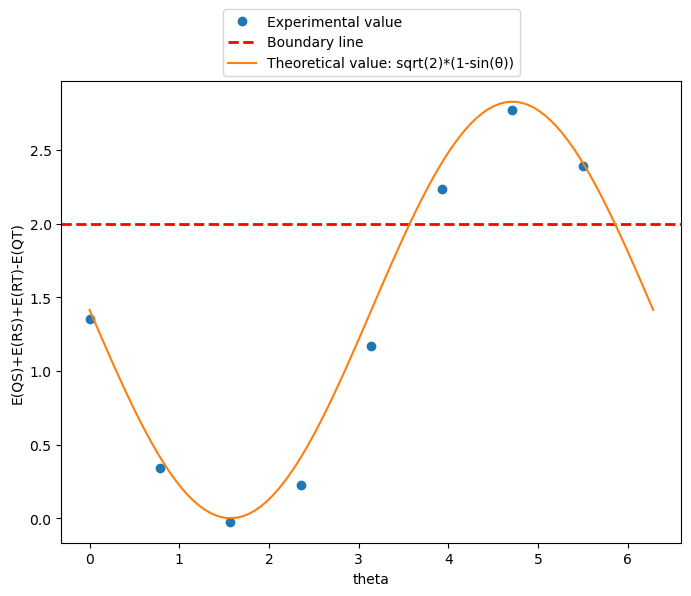

In [8]:
theta, obsexp, experimental = Bell_inequality_demo(theta_num = 8, experimental = True)
res=[obsexp[i][0] + obsexp[i][1] + obsexp[i][2] - obsexp[i][3] for i in range(len(obsexp))]  # E(QS)+E(RS)+E(RT)-E(QT)
for i in range(len(res)):
    print("θ={:.3f}*pi,".format(theta[i]/pi),"E(QS)+E(RS)+E(RT)-E(QT)={:.6f}".format(res[i]))  # Show the result data
# Show the result graph
plt.figure(figsize=(8, 6)) # Set the image size
plt.plot(theta, res, "o", label="Experimental value")
plt.axhline(y=2, color='red', linestyle='--', linewidth=2, label='Boundary line')  # Draw the boundary line of Bell's inequality
Plot_theoretical_value(x,y)
plt.show()

It can be seen that the experimental results are very close to the theoretical calculations, and a violation of Bell's inequality is observed.